# Zipfs law

## Definition
Let $F_n$ be the frequency (total number of occurences of the word in the text) of the n-th word in the text.
Then $F_n$ is proportional to $ 1/(n^a) $, where a is a constant. This relationsship is an empirical observation that hold true for most texts and languages.

In [164]:
import re

# Map words to number of occurences.
word_count: dict[str, int] = {}

# Total word count.
total_count: int = 0

def tokenize(text: str) -> list[str]:
    WORD_PATTERN = '[a-zA-Z]+'
    return re.findall(WORD_PATTERN, str(text).lower())

def count_words_in_file(file: str) -> tuple[dict[str, int], int]:
    counts: dict[str, int] = {} 
    total_count: int = 0
    with open(file) as file:
        for line in file:
            words = tokenize(line)
            for word in words:
                total_count += 1
                if word not in counts:
                    counts[word] = 1
                else:
                    counts[word] += 1
    return counts, total_count

In [165]:
word_count, total_count = count_words_in_file('GoetheFaust.txt')
print(f"Faust has {len(word_count)} unique words and {total_count} words in total")

Faust has 5826 unique words and 33830 words in total


In [166]:
word_frequencys = sorted(list(word_count.items()), key=lambda x: x[1], reverse=True)
print(word_frequencys)

[('und', 919), ('ich', 701), ('die', 693), ('der', 605), ('faust', 474), ('nicht', 426), ('das', 399), ('ein', 399), ('zu', 398), ('ist', 390), ('in', 341), ('du', 319), ('s', 313), ('sie', 304), ('es', 302), ('so', 295), ('mephistopheles', 292), ('den', 278), ('mit', 273), ('sich', 267), ('mir', 265), ('ihr', 260), ('er', 247), ('mich', 243), ('wie', 231), ('was', 230), ('da', 228), ('f', 213), ('auf', 213), ('h', 210), ('goethe', 206), ('t', 197), ('dem', 193), ('nur', 182), ('von', 175), ('an', 172), ('doch', 169), ('r', 144), ('euch', 138), ('m', 138), ('wenn', 132), ('im', 125), ('dich', 124), ('sch', 122), ('wir', 121), ('w', 111), ('man', 108), ('k', 105), ('dir', 104), ('als', 102), ('mein', 101), ('auch', 101), ('nun', 93), ('uns', 93), ('hier', 93), ('wird', 89), ('des', 89), ('margarete', 87), ('vor', 86), ('noch', 85), ('nach', 84), ('schon', 84), ('aus', 83), ('en', 81), ('sind', 78), ('ihn', 77), ('wohl', 75), ('bin', 74), ('hat', 74), ('l', 72), ('b', 71), ('mu', 71), ('

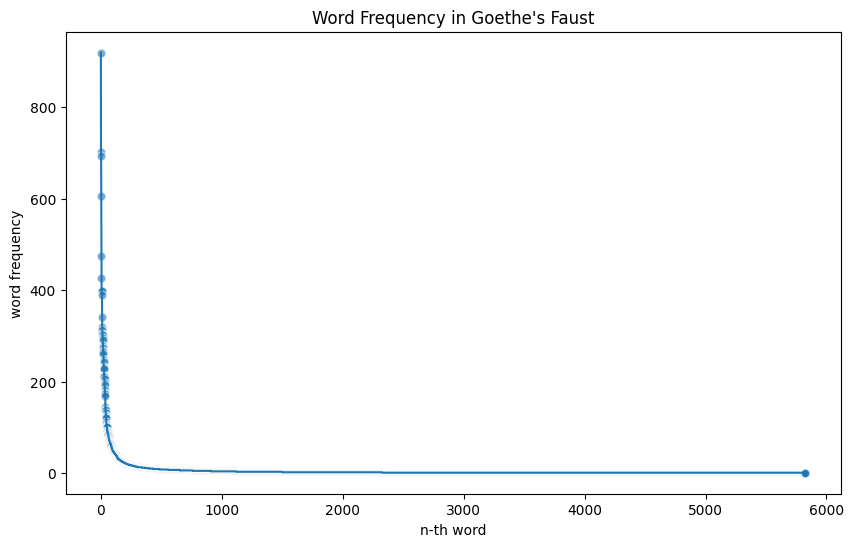

In [167]:
import matplotlib.pyplot as plt

x_val = [(i + 1) for i in range(len(word_frequencys))]
y_val = [pair[1] for pair in word_frequencys]

plt.figure(figsize=(10, 6))
plt.title('Word Frequency in Goethe\'s Faust')
plt.scatter(x_val, y_val, alpha=0.6, edgecolors='w', s=40, label='Empirical Data')
plt.plot(x_val, y_val)
plt.xlabel('n-th word')
plt.ylabel('word frequency')
plt.show()



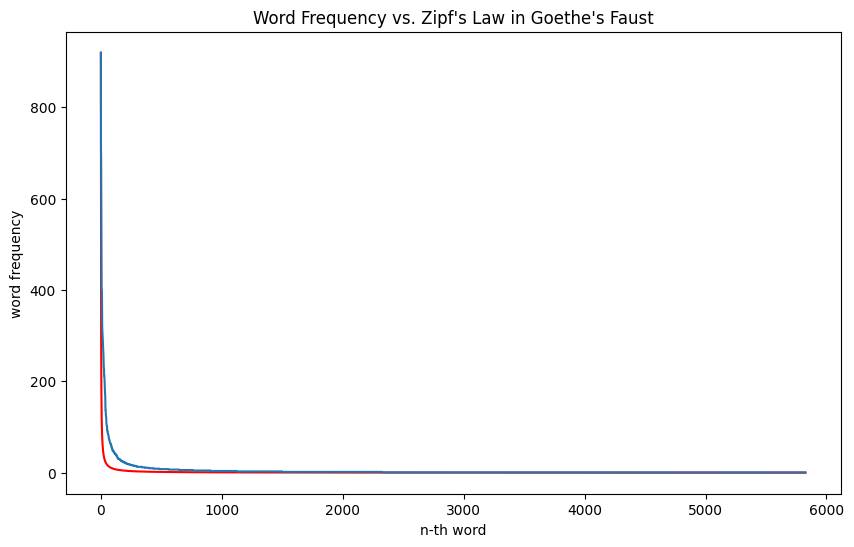

In [168]:
import numpy as np

def zipf_law(x: np.array, C: float = 1.0, a: float = 1) -> np.array:
    return C / (x ** a)

y_zipf = zipf_law(np.array(x_val), y_val[0])

plt.figure(figsize=(10, 6))
plt.title('Word Frequency vs. Zipf\'s Law in Goethe\'s Faust')
plt.plot(x_val, y_zipf, color='red', label=f'Zip\'s law')
plt.plot(x_val, y_val)

plt.xlabel('n-th word')
plt.ylabel('word frequency')
plt.show()